# Harshit Yadav

#                                            The Sparks Foundation
                   

# Task 6 - Decision tree classifier

## Create the Decision Tree classifier and visualize it graphically.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data processing

In [2]:
df=pd.read_csv('Task2.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop(columns='Id',axis=1,inplace=True) #dropping id column

In [4]:
df.isnull().any() #Checking for any null values

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


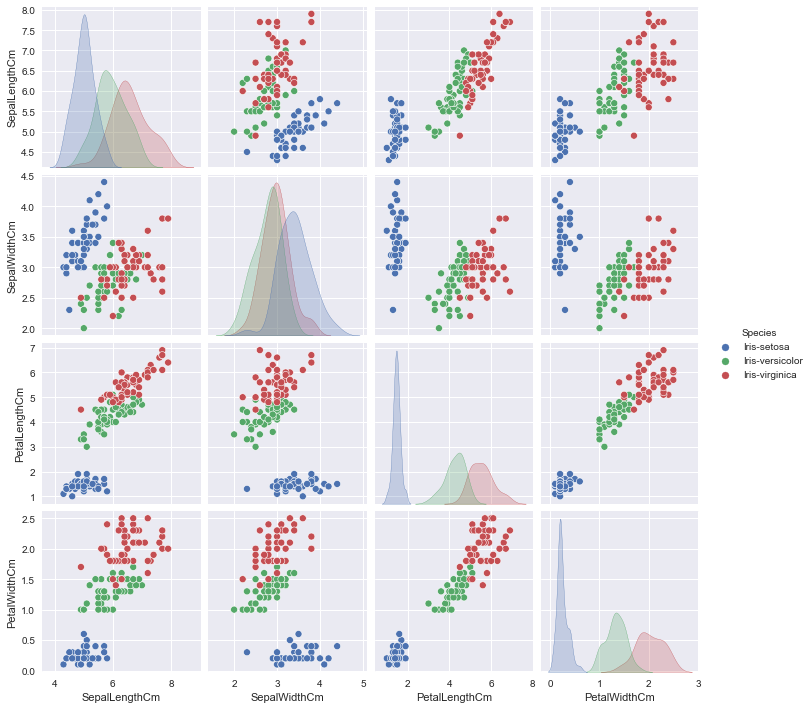

In [79]:
sns.pairplot(df,hue='Species')

# Algorithm Structure

         _______________________________________START__________________________________________________________
        |                                          |                                                           |
        |                                          |                                                           |
        |                                          |                                                           |
        |                                    PURITY_CHECK                                                      |
        |                   ________YES____________|________NO__________                                       |
        |                   |                                           |                                      |
        |         DATA_CLASSIFICATION                          GET_SPLIT_PARAMETER                             |
        |                   |                                           |                                      |
        |                   |                                           |                                      |
        |                  STOP                                  BEST_SPLIT->(CONSIDERING OVERALL ENTROPY)     |
        |                                                               |                                      |
        |                                                            SPLIT_DATA                                |
        |                                                               |                                      |
        |_______________________________________________________________|______________________________________|  

# Creating Helper functions

In [97]:
# Checks if the data recieved is pure
def purity_check(data):
    label_column=data[:,-1]
    unique_calsses=np.unique(label_column)
    if len(unique_calsses) == 1:
        return True
    else:
        return False

In [109]:
#if the data recieved is pure, this function classifies the data
def data_classification(data):
    label_column=data[:,-1]
    class_name,class_count=np.unique(label_column,return_counts=True)
    index=class_count.argmax()
    classification=class_name[index]
    return classification

In [100]:
#provides unique values correspodning to the column number in a dictionary datatype
def get_split_parameter(data):
    splits={}
    columns=data.shape[1]-1
    for column_index in range(columns):
        splits[column_index]=[]
        values=data[:,column_index]
        useful_values=np.unique(values)
        for i in range(len(useful_values)):
            if i!=0:
                current_value=useful_values[i]
                previous_value=useful_values[i-1]
                split=(current_value+previous_value) / 2
                splits[column_index].append(split)
    return splits

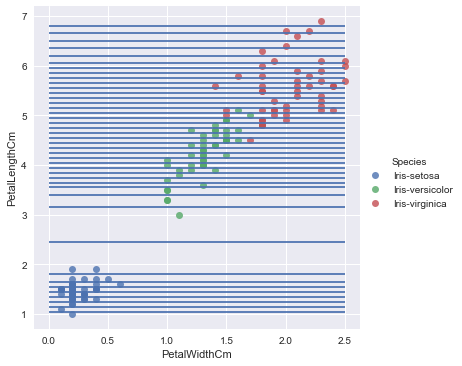

In [12]:
plt.style.use('seaborn')
sns.lmplot(data=df,x='PetalWidthCm', y='PetalLengthCm',hue='Species',fit_reg=False)
plt.hlines(y=get_split_parameter(df)[2],xmin=0,xmax=2.5)

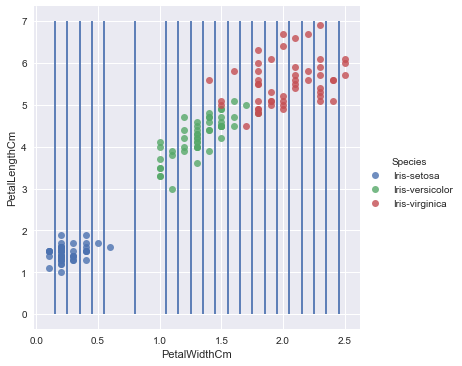

In [13]:
plt.style.use('seaborn')
sns.lmplot(data=df,x='PetalWidthCm', y='PetalLengthCm',hue='Species',fit_reg=False)
plt.vlines(x=get_split_parameter(df)[3],ymin=0,ymax=7)

### Split data

In [103]:
#splits data on YES|NO basis
def split_data(data,split_column,split_value):
    values_split_column=data[:,split_column]
    split1=data[values_split_column<=split_value]
    split2=data[values_split_column>split_value]
    return split1,split2

In [15]:
split_value=0.8
split1,split2=split_data(df,3,split_value)

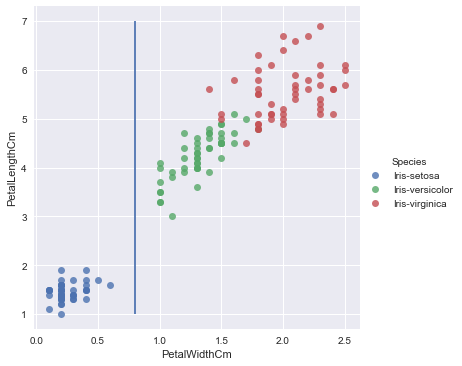

In [16]:
df1=pd.DataFrame(data=df,columns=df.columns)
sns.lmplot(data=df,x='PetalWidthCm', y='PetalLengthCm',hue='Species',fit_reg=False)
plt.vlines(x=split_value,ymin=1,ymax=7)

### Entropy function

In [106]:
#entropy helps us to know the impurity or we can say importance of question in classifing labels
def calculate_entropy(data):
    label_columns=data[:,-1]
    _,counts=np.unique(label_columns,return_counts=True)
    probability=counts/counts.sum()
    entropy=sum(probability*-np.log2(probability))
    return entropy

In [18]:
def calculate_overall_entropy(split1,split2):
    len_data_points=len(split1)+len(split2)
    p_split1=len(split1)/len_data_points
    p_split2=len(split2)/len_data_points
    overall_entropy=p_split1*calculate_entropy(split1)+p_split2*calculate_entropy(split2)
    return overall_entropy

In [19]:
calculate_overall_entropy(split1,split2)

0.6666666666666666

In [22]:
#works to find the best column and best value for splitting on YES|NO basis
def best_split(data,splits):
    split_dict=get_split_parameter(data)
    entropy=1000
    for column_index in split_dict:
        for value in split_dict[column_index]:
            split1,split2=split_data(data,column_index,value)
            current_overall_entropy=calculate_overall_entropy(split1,split2)
            if current_overall_entropy<=entropy:
                entropy=current_overall_entropy
                best_split_column=column_index
                best_split_value=value
    return best_split_column,best_split_value

In [23]:
best_split(df,get_split_parameter(df))

(3, 0.8)

# Decision tree algorithm

         _______________________________________START__________________________________________________________
        |                                          |                                                           |
        |                                          |                                                           |
        |                                          |                                                           |
        |                                    PURITY_CHECK                                                      |
        |                   ________YES____________|________NO__________                                       |
        |                   |                                           |                                      |
        |         DATA_CLASSIFICATION                          GET_SPLIT_PARAMETER                             |
        |                   |                                           |                                      |
        |                   |                                           |                                      |
        |                  STOP                                  BEST_SPLIT->(CONSIDERING OVERALL ENTROPY)     |
        |                                                               |                                      |
        |                                                            SPLIT_DATA                                |
        |                                                               |                                      |
        |_______________________________________________________________|______________________________________|  

In [125]:
#THE MAIN ALGORITHM COMBINING HELPING FUNCTION ACCORDING TO THE FLOW DIAGRAM ABOVE
def decision_tree_algorithm(df, counter=0):
    if counter==0:
        data=df.values
    else:
        data=df
        
    if purity_check(data):
        classified=data_classification(data)
        return classified
    else:
        counter+=1
        
        split_parameters=get_split_parameter(data)
        split_column,split_value=best_split(data,split_parameters)
        split1,split2=split_data(data,split_column,split_value)
        
        question=f'{split_column}<={split_value}'
        sub_tree={question:[]}
        
        answer_yes=decision_tree_algorithm(split1,counter)
        answer_no=decision_tree_algorithm(split2,counter)
        
        sub_tree[question].append(answer_yes)
        sub_tree[question].append(answer_no)
        
        return sub_tree

## Tree visualisation`

In [128]:
from pprint import pprint
pprint(decision_tree_algorithm(df))

{'3<=0.8': ['Iris-setosa',
            {'3<=1.75': [{'2<=4.95': [{'3<=1.65': ['Iris-versicolor',
                                                   'Iris-virginica']},
                                      {'3<=1.55': ['Iris-virginica',
                                                   {'2<=5.449999999999999': ['Iris-versicolor',
                                                                             'Iris-virginica']}]}]},
                         {'2<=4.85': [{'1<=3.1': ['Iris-virginica',
                                                  'Iris-versicolor']},
                                      'Iris-virginica']}]}]}
